<a href="https://colab.research.google.com/github/Tung0000/Opencv2_colab/blob/main/opencv_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from glob import glob

In [ ]:
from google.colab.patches import cv2_imshow

#Image Preprocessing

#RGB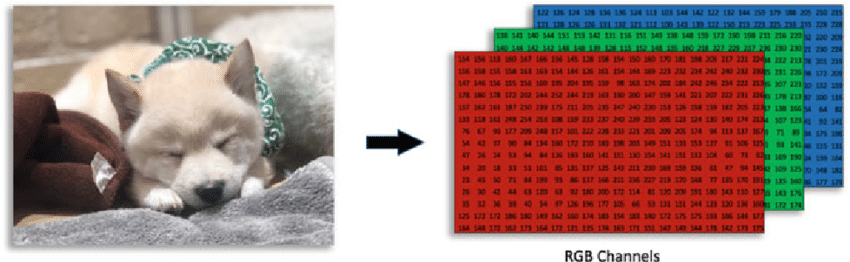

#Test0

In [ ]:
import cv2
import os

# --- SETTINGS ---
video_path = "/content/2583475-hd_1920_1080_24fps.mp4"  # Change your input video name
output_path = "output_hsv.mp4"

# --- VIDEO INPUT ---
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width, height)

# --- VIDEO WRITER ---
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, size, isColor=True)

# --- PROCESS FRAMES ---
while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    out.write(hsv_frame)  # Save HSV frame directly

# --- CLEAN UP ---
cap.release()
out.release()
print("HSV video saved successfully!")

In [ ]:
hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

In [ ]:
import cv2
import os

# --- SETTINGS ---
video_path = "/content/2583475-hd_1920_1080_24fps.mp4"  # Change your input video name
output_path = "output_hsv.mp4"

# --- VIDEO INPUT ---
cap = cv2.VideoCapture(video_path)

# --- VIDEO WRITER ---
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, size, isColor=True)

# --- PROCESS FRAMES ---
while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    out.write(hsv_frame)  # Save HSV frame directly

# --- CLEAN UP ---
cap.release()
out.release()
print("HSV video saved successfully!")

In [ ]:
soure="/content/istockphoto-187347653-612x612.jpg"
img=cv2.imread(soure)#BGR
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)#RGB

In [ ]:
hsv=cv2.cvtColor(rgb,cv2.COLOR_BGR2HSV)
H ,S ,V=cv2.split(hsv)

lower_cloud = np.array([0, 0, 80])
upper_cloud = np.array([180, 160, 250])
blur=cv2.GaussianBlur(hsv,(5,5),0)
mask=cv2.inRange(blur,lower_cloud,upper_cloud)

plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.title("air plan")


In [ ]:
kernal=np.ones((10,10),np.uint8)/100

mark_hsv=cv2.erode(mask,kernal,iterations=2) #กัดเซาะให้กร่อนหายไป
plt.imshow(mark_hsv,cmap='gray')



In [ ]:
kernel_big=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
mark_hsv=cv2.morphologyEx(mark_hsv, cv2.MORPH_OPEN, kernel_big)
mark_hsv=cv2.morphologyEx(mark_hsv, cv2.MORPH_CLOSE, kernel_big)

plt.imshow(mark_hsv,cmap='gray')

In [ ]:
mark_cruise_ship=cv2.bitwise_not(mark_hsv)
plt.imshow(mark_cruise_ship,cmap='gray')
plt.show()


mark_sky_only=cv2.bitwise_and(rgb,rgb,mask=mark_cruise_ship)
plt.imshow(mark_sky_only, cmap="gray")
plt.show()

mark_sky_only=cv2.bitwise_and(rgb,rgb,mask=mark_hsv)
plt.imshow(mark_sky_only, cmap="gray")
plt.show()

In [ ]:
gray=cv2.cvtColor(mark_sky_only,cv2.COLOR_RGB2GRAY)
kernal_bh=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(200,200))
blackhat=cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernal_bh)
plt.imshow(blackhat,cmap='gray')

In [ ]:
kernal_dl=np.ones((10,10) , np.uint8)
blackhat_dl=cv2.dilate(blackhat,kernal_dl)

plt.imshow(blackhat_dl,cmap='gray')

In [ ]:
_, cand = cv2.threshold(blackhat_dl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cand = cv2.morphologyEx(cand, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

plt.imshow(cand, cmap='gray'); plt.axis('off'); plt.title("Step 7: Candidates"); plt.show()

In [ ]:
cnts=cv2.findContours(cand,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


vis=rgb.copy()
boxse=[]

for c in cnts:
    area=cv2.contourArea(c)
    if area <4000:
        continue
    x,y,w,h=cv2.boundingRect(c)


    boxes.append((x,y,w,h))
    cv2.rectangle(vis(x,y) , (x+w,y+h),(255,255,0),0)


plt.imshow(vis)

In [ ]:
cnts, _ = cv2.findContours(cand, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

vis = rgb.copy()
boxes = []
for c in cnts:
    area = cv2.contourArea(c)
    if area < :   # ปรับตามความละเอียดภาพ/ขนาดโดรนที่คาดหวัง
        continue
    x,y,w,h = cv2.boundingRect(c)

    boxes.append((x,y,w,h))
    cv2.rectangle(vis, (x,y), (x+w, y+h), (255,255,0), 1)

plt.imshow(vis); plt.axis('off'); plt.title(f"Step 8: Detections (N={len(boxes)})"); plt.show()
print("Detections:", boxes)


#Test Photo

In [ ]:
source="/content/megalodon_warpaint_shutterstock-full-width.jpg"
img=cv2.imread(source)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


result=[]
def resizes(size,*images):
  for im in images:
    resize=cv2.resize(im,size)
    result.append(resize)
  return result

img_re, img_rgb_re, img_gray_re = resizes((500, 500), img, rgb, img_gray)

for i in [img_re, img_rgb_re, img_gray_re]:
  cv2_imshow(i)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
type(img)

In [ ]:
img.shape

In [ ]:
pd.Series(img.flatten()).plot(kind="hist",
                              bins=50,
                              title="Distribution of pixel Values")

plt.show()

#เปลี่ยน HSV segmention

In [ ]:
re_bgr= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(re_bgr)


sky = (H >= 90) & (H <= 130) & (S >= 20) & (V >= 200)
clouds = (S <= 40) & (V >= 180)
sky_mask = (sky | clouds).astype(np.uint8) * 255

plt.imshow(sky_mask, cmap='gray')
plt.axis('off')
plt.title("Bird")
plt.show()

#Denoising and erode

In [ ]:
kernel=np.ones((3,3),np.uint32) /9
blurred=cv2.filter2D(sky_mask , -1 , kernel)
sky_mask = cv2.erode(sky_mask, kernel, iterations=2)
x=cv2.imread("sky_mask.jpg",sky_mask)
resize_x=cv2.resize(x,(500,500))
cv2_imshow(resize_x)

#Clean

In [ ]:
kernel_big = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
sky_mask = cv2.morphologyEx(sky_mask, cv2.MORPH_OPEN, kernel_big)
sky_mask = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel_big)


plt.imshow(sky_mask, cmap='gray'); plt.axis('off'); plt.title(" Birds Mask (clean)"); plt.show()

#bitwise_not and bitwise_and

In [ ]:
see_mask = cv2.bitwise_not(sky_mask)
plt.imshow(see_mask, cmap='gray'); plt.axis('off'); plt.title("Step 3a: Mountains/Ground Mask"); plt.show()

sky_only = cv2.bitwise_and(rgb, rgb, mask=see_mask )
plt.imshow(sky_only); plt.axis('off'); plt.title("Sky Only"); plt.show()


In [ ]:
gray = cv2.cvtColor(sky_only, cv2.COLOR_RGB2GRAY)
kernel_bh = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel_bh)

plt.imshow(blackhat, cmap='gray'); plt.axis('off'); plt.title("Step 5: Black-hat"); plt.show()


#Use Dilate

In [ ]:
kernel_d = np.ones((3,3), np.uint64)/9
blackhat_d = cv2.dilate(blackhat, kernel_d)

plt.imshow(blackhat_d, cmap='gray'); plt.axis('off'); plt.title("Step 5: Black-hat (Dilated)"); plt.show()


#Black Hat

In [ ]:
_, cand = cv2.threshold(blackhat_d, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cand = cv2.morphologyEx(cand, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

plt.imshow(cand, cmap='gray'); plt.axis('off'); plt.title("Step 7: Candidates"); plt.show()


#Contours

In [ ]:
cnts, _ = cv2.findContours(cand, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

vis = rgb.copy()
boxes = []
for c in cnts:
    area = cv2.contourArea(c)
    if area < 100:   # ปรับตามความละเอียดภาพ/ขนาดโดรนที่คาดหวัง
        continue
    x,y,w,h = cv2.boundingRect(c)

    boxes.append((x,y,w,h))
    cv2.rectangle(vis, (x,y), (x+w, y+h), (255,0,0), 2)

plt.imshow(vis); plt.axis('off'); plt.title(f"Step 8: Detections (N={len(boxes)})"); plt.show()
print("Detections:", boxes)


# Step1 Test Webcam

In [ ]:
cap=cv2.VideoCapture(0)

if not cap.isOpened():
  raise RuntimeError("เปิดกล้องไม่ได้")
else:
  print("เปิดกล้องสำเร็จ")


while True:
  check,frame=cap.read()
  if not check:break
  cv2.inshow(frame)
  if cv2.waitKey(1) &0xF==ord("q")


print("จบการทำงาน")
cap.release()
cv2.destroyAllWindows()

#Step2 ปรับสีที่ต้องการจะตรวจจับโดยใช้ Trackbar

#H: 5 – 25
#S: 200 – 255
#V: 120 – 255

โค้ดนี้ถูกออกแบบมาเป็น เครื่องมือทดลอง คุณเลื่อน Trackbar, ค่า h_L, s_L, v_L ก็เปลี่ยนไป, จากนั้น lower และ upper ก็ถูกสร้างใหม่ให้สอดคล้องกับที่คุณปรับทันที

In [ ]:
cap = cv2.VideoCapture(0)
cv2.namedWindow("HSV")
cv2.resize(1280*720)


def empty(a):
  pass

#H (Hue): ปรับจูนสีหลัก
cv2.createTrackbar("H :Lower",0, 179 ,empty)#ตามปกติมี 179-180 ไม่เหมือน RGB 360
cv2.createTrackbar("H :Upper",179, 179 ,empty)
#S (Saturation): ปรับความเข้มของสี
cv2.createTrackbar("S :Lower",0, 255 ,empty)
cv2.createTrackbar("S :Upper",255, 255 ,empty)
#V (Value): ปรับความสว่างของสี
cv2.createTrackbar("V :Lower",0, 255,empty)
cv2.createTrackbar("V :Upper",255, 255 ,empty)


while True:
  check , frame =cap.read()
  if  not check : break
  #HUE TrackBar
  h_L=cv2.getTrackbarPos("H :Lower","HSV")
  h_UPPER=cv2.getTrackbarPos("H:Upper" ,"HSV")
  #Saturation TrackBar
  s_L=cv2.getTrackbarPos("S :Lower","HSV")
  s_UPPER=cv2.getTrackbarPos("S: Upper" ,"HSV")
  #Value TrackBar
  v_L=cv2.getTrackbarPos("V :Lower","HSV")
  v_UPPER=cv2.getTrackbarPos("V: Upper" ,"HSV")

  img_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
  lower=np.array([h_L,s_L,v_L])
  upper=np.array([h_UPPER,s_UPPER,v_UPPER])
  mask_hsv=cv2.inRange(img_hsv,lower,upper)
  result=cv2.bitwise_and(frame, frame,mask=mask_hsv)
  mask=cv2.cvtColor(mask_hsv,cv2.COLOR_GRAY2BGR)
  stack=np.hstack([img_hsv, mask,result])
  cv2.imshow("Stack",stack)
  if cv2.waitKey(1) & 0xFF == ord('c'):
    break

cap.release()
cv2.destroyAllWindows
print("จบการทำงาน")



#Step3 สร้างmark สีที่ต้องการจาก Trackbar จากค่า HSV ที่ได้
#นำค่าสีที่ต้องการมาใช้
#สร้าง Mask ของลูกบอลสีส้มจากค่าที่ได้ในบทที่ 2

#ใช้ฟังก์ชัน `cv2.inRange()` เพื่อเลือกเฉพาะพิกเซลที่อยู่ในช่วง HSV ที่กำหนด

In [ ]:
Lower_Onage=(20,20,20)
Upper_Orange=(20,20,20)

cap=cv2.VideoCapture(0)

while True:
  check ,frame =cap.read()
  if not check : break
  img_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
  mask=cv2.inRange(img_hsv,Lower_Onage,Upper_Orange)
  result=cv2.bitwise_and(frame , frame , mask=mask)
  stack=np.hstack([frame,mask,result])
  cv2.imshow(stack)

  if cv2.waitKey(1) & 0xFF == ord('c'):
    break

cap.release()
cv2.destroyAllWindows()



#(HSV,Morphological)  , (Threshold สำหรับ edge detection)

#Canny Edge → ใช้การตรวจขอบ (Canny, Dilate)

#HSV Mask → ใช้การตรวจสี (inRange, Morphology)

In [ ]:
def empty(a):
  pass

cap = cv2.VideoCapture(0)

# ===== Trackbar Window =====
cv2.namedWindow("Adjust", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Adjust", 1280, 720)

#Hsv Color
Lower_Onage=(20,20,20)
Upper_Orange=(20,20,20)


#cv2.createTrackbar(trackbar_name, window_name, value_initial, max_value, callback)
#HSV
cv2.createTrackbar("Blur", "Adjust", 7,   31,  empty)   # Blur ksize
cv2.createTrackbar("Kernel", "Adjust", 5,   31,  empty)   # Morph kernel k
cv2.createTrackbar("Open", "Adjust", 3,   3,  empty)
cv2.createTrackbar("Close", "Adjust", 3,   3,  empty)
cv2.createTrackbar("Min area", "Adjust", 100,   10000, empty)

#Edge
cv2.createTrackbar("Threshold1", "Adjust", 150,   255,  empty)
cv2.createTrackbar("Threshold2", "Adjust", 255,   255,  empty)
cv2.createTrackbar("Ege area", "Adjust", 3000,   30000,  empty)


while True:
  check ,frame =cap.read()
  if not check : break

  # Canny parameters
  t1=cv2.getTrackbarPos("Threshold1","Adjust")
  t2=cv2.getTrackbarPos("Threshold2","Adjust")
  edge_area=cv2.getTrackbarPos("Ege area","Adjust") #

  #Edge
  gray_img=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  blure=cv2.GaussianBlur(gray_img,(5,5),0) #Kernel Size ของ Gaussian Blur ต้องเป็นเลขคี่เสมอ
  edges=cv2.Canny(blure,t1,t2)
  kernel=np.ones((5,5),np.uint8)
  edge_dilate=cv2.dilate(edges,kernel,iterations=1)
  contours_img_edge=frame.copy()#ก็อปไว้ไม่ให้รูปต้นฉบับเสียหาย
  contours_edge=cv2.findContours(edge_dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#Contour (รูปร่าง)
  for c in contours_edge:
    area=cv2.contourArea(c)
    if area>edge_area:
      x,y,w,h=cv2.boundingRect(c)
      cv2.rectangle(contours_img_edge,(x,y),(x+w,y+h),(0,255,0),2)
  cv2.putText(contours_img_edge,f"Edge Area>{edge_area} | Contours={len(contours_edge)}",
   (10,25) , cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)


  #Hsv Parameter
  blur=cv2.getTrackbarPos("Blur","Adjust")
  kernel_size=cv2.getTrackbarPos("Kernel","Adjust")
  Open=cv2.getTrackbarPos("Open","Adjust")
  Close=cv2.getTrackbarPos("Close","Adjust")
  min_area=cv2.getTrackbarPos("Min area","Adjust")

  #HSV
  blurred=cv2.GaussianBlur(frame,(blur,blur),0)
  hsv=cv2.cvtColor(blurred,cv2.COLOR_BGR2HSV)
  mask=cv2.inRange(hsv,Lower_Onage,Upper_Orange)
  kernel_hsv=np.ones((kernel_size,kernel_size),np.uint8)
  if Open > 0:
    mask=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel_hsv,iterations=Open)
  if Close > 0:
    mask=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel_hsv,iterations=Close)
  contours_img_hsv=frame.copy()
  contours_hsv=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  contours_hsv = contours_hsv[0]
  for c in contours_hsv:
      area=cv2.contourArea(c)
      if area>min_area:
        x,y,w,h=cv2.boundingRect(c)
        cv2.rectangle(contours_img_hsv,(x,y),(x+w,y+h),(0,255,0),2)
  cv2.putText(contours_img_hsv,f"HSV Area>{min_area} | Contours={len(contours_hsv)}",
                (10,25) ,cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)

    f1=cv2.resize(frame,(500,500))
    f2=cv2.resize(contours_img_edge,(500,500))
    f3=cv2.resize(contours_img_hsv,(500,500))

    combined=np.hstack([f1,f2,f3])
    cv2.putText(combined, "Original | Edge | HSV" ,
                (10,230) , cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2)

    cv2.imshow("Adjust",combined)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()

#Track เส้นทางการเคลื่อนไหวของลูกบอล

In [ ]:
# วาดเส้นทางการเคลื่อนที่ (trail)
import cv2, numpy as np
from collections import deque

LOWER_ORANGE = (5, 200, 120)  #lower_best=(5, 120, 150)
UPPER_ORANGE = (25, 255, 255) #upper_best=(20,255,255)

kernel_hsv = np.ones((5,5), np.uint8)
HISTORY = 64
pts = deque(maxlen=HISTORY)

cap = cv2.VideoCapture(0)

while True:
    ok, frame = cap.read()
    if not ok: break
    blurred = cv2.GaussianBlur(frame, (7,7), 0)
    hsv  = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, LOWER_ORANGE, UPPER_ORANGE)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_hsv, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_hsv, iterations=2)

    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = frame.copy()
    center = None
    if cnts:
        c = max(cnts, key=cv2.contourArea)
        (x,y,w,h) = cv2.boundingRect(c)
        center = (x+w//2, y+h//2)
        if w*h > 200:  # ป้องกันจุดเล็ก
            cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.circle(output, center, 5, (0,0,255), -1)

    pts.appendleft(center)
    for i in range(1, len(pts)):
        if pts[i-1] is None or pts[i] is None: continue
        thickness = int(np.sqrt(HISTORY/float(i+1))*2)
        cv2.line(output, pts[i-1], pts[i], (0,0,255), thickness)

    cv2.imshow("Mask", mask)
    cv2.imshow("Trail", output)
    if cv2.waitKey(1) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()


#รวมทั้งหมดเข้าด้วยกัน การติดตามหลายลูกบอลพร้อมกันด้วย Centroid Tracker

In [ ]:
import cv2
import numpy as np
import time

# === Centroid Tracker with full path tracking (unchanged) ===
class CentroidTracker:
    def __init__(self, max_disappeared=50):
        self.nextObjectID = 0
        self.objects = {}         # objectID: centroid
        self.disappeared = {}     # objectID: frame count
        self.trajectories = {}    # objectID: list of centroids
        self.max_disappeared = max_disappeared

    def register(self, centroid):
        self.objects[self.nextObjectID] = centroid
        self.disappeared[self.nextObjectID] = 0
        self.trajectories[self.nextObjectID] = [centroid]
        self.nextObjectID += 1

    def deregister(self, objectID):
        del self.objects[objectID]
        del self.disappeared[objectID]
        del self.trajectories[objectID]

    def update(self, rects):
        if len(rects) == 0:
            for objectID in list(self.disappeared.keys()):
                self.disappeared[objectID] += 1
                if self.disappeared[objectID] > self.max_disappeared:
                    self.deregister(objectID)
            return self.objects, self.trajectories

        input_centroids = np.zeros((len(rects), 2), dtype="int")
        for i, (x, y, w, h) in enumerate(rects):
            input_centroids[i] = (x + w // 2, y + h // 2)

        if len(self.objects) == 0:
            for i in range(len(input_centroids)):
                self.register(input_centroids[i])
        else:
            objectIDs = list(self.objects.keys())
            object_centroids = list(self.objects.values())

            D = np.linalg.norm(np.array(object_centroids)[:, None] - input_centroids[None, :], axis=2)
            rows = D.min(axis=1).argsort()
            cols = D.argmin(axis=1)[rows]

            used_rows = set()
            used_cols = set()

            for row, col in zip(rows, cols):
                if row in used_rows or col in used_cols:
                    continue
                objectID = objectIDs[row]
                self.objects[objectID] = input_centroids[col]
                self.disappeared[objectID] = 0
                self.trajectories[objectID].append(input_centroids[col])  # keep full path
                used_rows.add(row)
                used_cols.add(col)

            for row in set(range(D.shape[0])) - used_rows:
                objectID = objectIDs[row]
                self.disappeared[objectID] += 1
                if self.disappeared[objectID] > self.max_disappeared:
                    self.deregister(objectID)

            for col in set(range(D.shape[1])) - used_cols:
                self.register(input_centroids[col])

        return self.objects, self.trajectories

# ===== 1.Load video or webcam =====
# Set to 0 for webcam, or a path like "source_dir/vdo1.mov"
video_path = 0
cap = cv2.VideoCapture(video_path)

# ===== Create window + trackbars (for ORANGE in HSV) =====
cv2.namedWindow("Adjust", cv2.WINDOW_NORMAL)

def nothing(x): pass

# HSV lower/upper trackbars
cv2.createTrackbar("H Low",  "Adjust", 5,   179, nothing)
cv2.createTrackbar("H High", "Adjust", 25,  179, nothing)
cv2.createTrackbar("S Low",  "Adjust", 120, 255, nothing)
cv2.createTrackbar("S High", "Adjust", 255, 255, nothing)
cv2.createTrackbar("V Low",  "Adjust", 120, 255, nothing)
cv2.createTrackbar("V High", "Adjust", 255, 255, nothing)

# 2.Morphology + size
cv2.createTrackbar("Dilate",   "Adjust", 2,  20, nothing)
cv2.createTrackbar("Erode",    "Adjust", 0,  10, nothing)
cv2.createTrackbar("Min Area", "Adjust", 300, 5000, nothing)

# ===== Init tracker & FPS =====
tracker = CentroidTracker()
paused = False
frame = None
prev_time = time.time()

while cap.isOpened():
    if not paused:
        ret, img = cap.read()
        if not ret:
            print("✅ Video ended or can't read frame.")
            break
        frame = img.copy()
    else:
        if frame is None:
            continue
        img = frame.copy()

    # Resize for consistent processing & speed
    img = cv2.resize(img, (1280, 720))

    # --- Preprocess ---
    blurred = cv2.GaussianBlur(img, (7, 7), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    # --- Read parameters ---
    hL = cv2.getTrackbarPos("H Low",  "Adjust")
    sL = cv2.getTrackbarPos("S Low",  "Adjust")
    vL = cv2.getTrackbarPos("V Low",  "Adjust")
    hH = cv2.getTrackbarPos("H High", "Adjust")
    sH = cv2.getTrackbarPos("S High", "Adjust")
    vH = cv2.getTrackbarPos("V High", "Adjust")
    erode_val  = cv2.getTrackbarPos("Erode",  "Adjust")
    dilate_val = cv2.getTrackbarPos("Dilate", "Adjust")
    min_area   = cv2.getTrackbarPos("Min Area","Adjust")

    lower_orange = (min(hL, hH), min(sL, sH), min(vL, vH))
    upper_orange = (max(hL, hH), max(sL, sH), max(vL, vH))

    # --- HSV masking for orange ---
    mask = cv2.inRange(hsv, lower_orange, upper_orange)

    # --- Morphology to clean noise ---
    kernel = np.ones((5, 5), np.uint8)
    if erode_val > 0:
        mask = cv2.erode(mask, kernel, iterations=erode_val)
    if dilate_val > 0:
        mask = cv2.dilate(mask, kernel, iterations=dilate_val)

    # --- Contour Detection (blobs for orange) ---
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = img.copy()
    rects = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < min_area:
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        rects.append((x, y, w, h))

    # --- Update tracker ---
    objects, trajectories = tracker.update(rects)

    # --- Draw bounding boxes, ID, and full path ---
    for objectID, centroid in objects.items():
        # Draw full path
        path = trajectories[objectID]
        for i in range(1, len(path)):
            cv2.line(output, path[i - 1], path[i], (255, 0, 255), 2)

        # Draw rectangle and ID (match rect nearest to centroid)
        best = None
        best_dist = 1e9
        for (x, y, w, h) in rects:
            cX = x + w // 2
            cY = y + h // 2
            d = (cX - centroid[0])**2 + (cY - centroid[1])**2
            if d < best_dist:
                best_dist = d
                best = (x, y, w, h)
        if best is not None:
            x, y, w, h = best
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(output, f"ID {objectID}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            cv2.circle(output, tuple(centroid), 5, (0, 0, 255), -1)

    # --- FPS Display ---
    current_time = time.time()
    fps = 1.0 / max(1e-6, (current_time - prev_time))
    prev_time = current_time
    cv2.putText(output, f"FPS: {fps:.2f}", (output.shape[1] - 150, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # --- Show Combined Output (Frame | Mask | Output) ---
    vis_frame = cv2.resize(img, (426, 240))
    vis_mask  = cv2.resize(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), (426, 240))
    vis_out   = cv2.resize(output, (426, 240))
    combined  = np.hstack((vis_frame, vis_mask, vis_out))
    cv2.imshow("Adjust", combined)

    key = cv2.waitKey(1 if not paused else 100) & 0xFF
    if key == 27:  # ESC
        break
    elif key == 32:  # SPACEBAR to pause
        paused = not paused

print("Finished.")

cap.release()
cv2.destroyAllWindows()


#ai_server.py

In [ ]:
# ai_server.py
from flask import Flask, request, jsonify
import numpy as np
import cv2
from 6_centroid_tracker_multi import CentroidTracker  # นำ class จากไฟล์คุณมาใช้

app = Flask(__name__)
tracker = CentroidTracker()

@app.route("/detect", methods=["POST"])
def detect():
    # รับไฟล์ภาพจาก Pi
    file = request.files.get("image")
    if file is None:
        return jsonify({"error": "No image uploaded"}), 400

    nparr = np.frombuffer(file.read(), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # --- ประมวลผลง่าย ๆ (ไม่ต้องมี trackbar) ---
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = (5, 120, 120)
    upper = (25, 255, 255)
    mask = cv2.inRange(hsv, lower, upper)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 300:  # ปรับได้
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        rects.append((x, y, w, h))

    objects, trajectories = tracker.update(rects)

    results = []
    for objectID, centroid in objects.items():
        results.append({
            "id": int(objectID),
            "x": int(centroid[0]),
            "y": int(centroid[1]),
            "path": [list(map(int, p)) for p in trajectories[objectID]]
        })

    return jsonify({"detections": results})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


#ฝั่ง Raspberry Pi (pi_client.py)

In [ ]:
# pi_client.py
import cv2
import requests

SERVER_URL = "http://<AI_SERVER_IP>:5000/detect"  # แก้เป็น IP เครื่องคุณ

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # บีบอัดเพื่อส่งเร็วขึ้น
    _, img_encoded = cv2.imencode(".jpg", frame)
    response = requests.post(SERVER_URL, files={"image": ("frame.jpg", img_encoded.tobytes())})

    if response.ok:
        data = response.json()
        print(data)  # ดูผลลัพธ์ที่ AI ส่งกลับมา (id, x, y)
    else:
        print("Error:", response.status_code)

cap.release()
